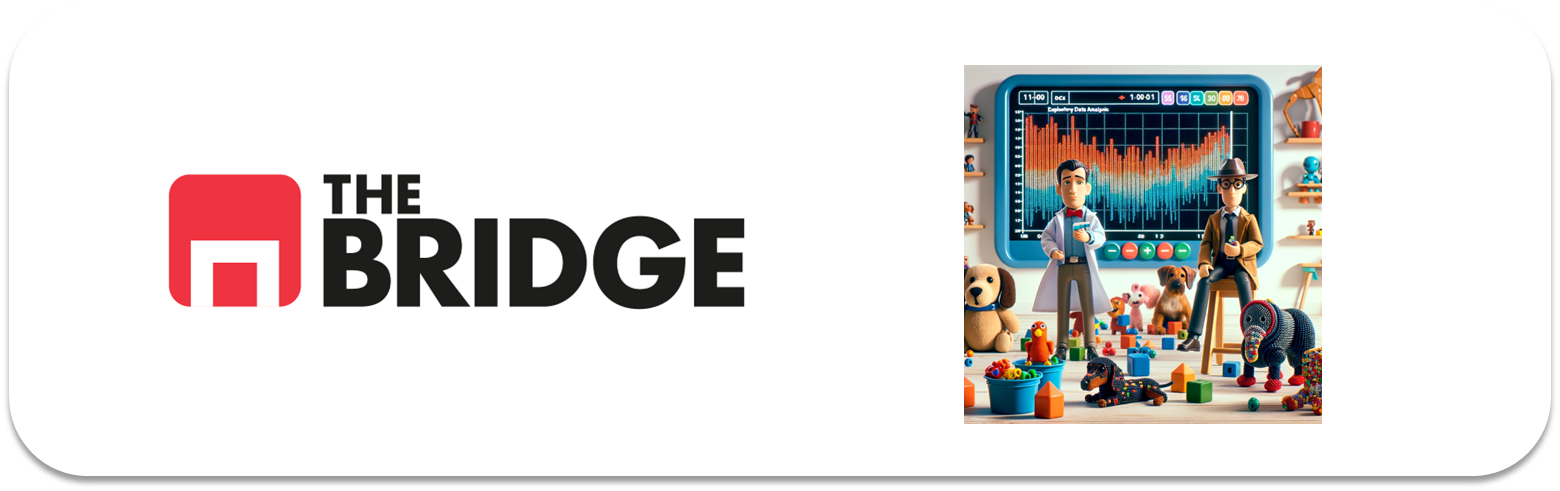

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency



In [19]:
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [11]:
df1 = pd.read_csv("./data/titanic.csv")
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [12]:
df1 = df1.drop(columns=["deck", "survived", "pclass", "embarked"])
df1.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [13]:
df1["family_members"] = df1["parch"] + df1["sibsp"]
df1 = df1.drop(columns=["parch", "sibsp"])
df1.head()




,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [14]:
df1["embark_town"] = df1["embark_town"].fillna(df1["embark_town"].mode()[0])


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [15]:
medias_por_grupo = df1.groupby("who")["age"].mean()
medias_por_grupo

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [16]:
df1["age"] = df1["age"].fillna(df1.groupby("who")["age"].transform("mean"))



In [25]:
df1

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,32.0,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

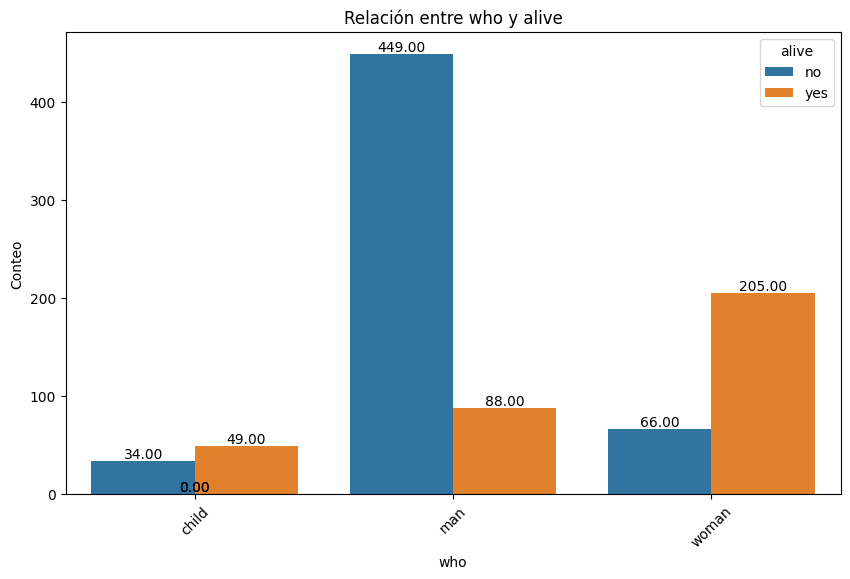

In [27]:
plot_categorical_relationship_fin(df1, "who", "alive", relative_freq=False, show_values=True)

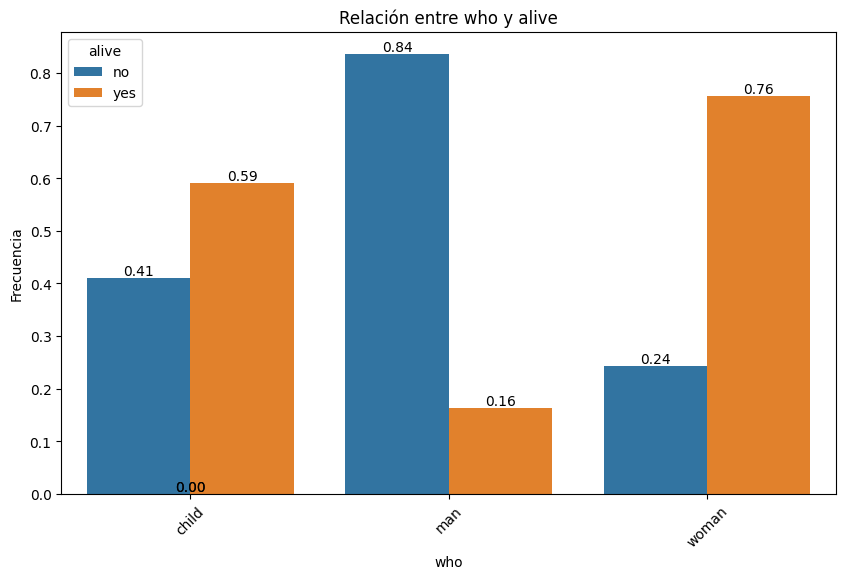

In [29]:
plot_categorical_relationship_fin(df1, "who", "alive", relative_freq=True, show_values=True)

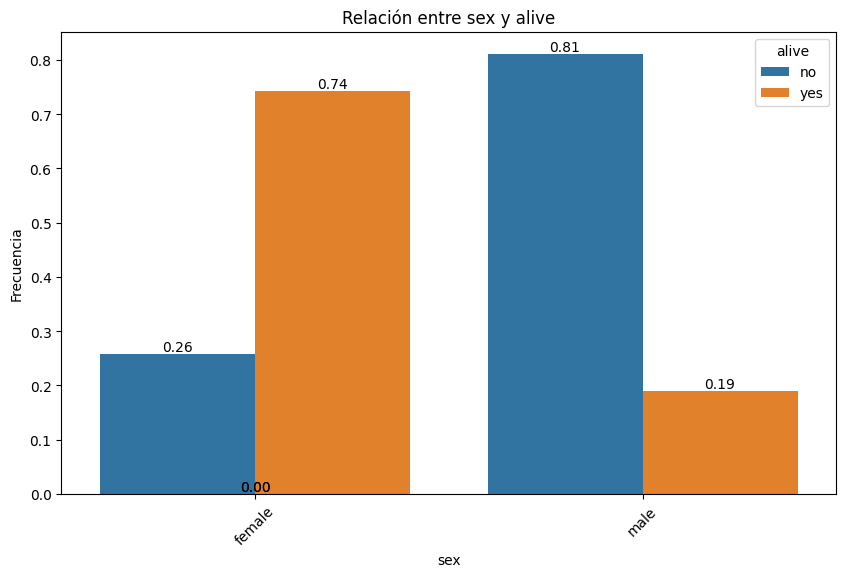

In [31]:
plot_categorical_relationship_fin(df1, "sex", "alive", relative_freq=True, show_values=True)

In [32]:
from scipy.stats import chi2_contingency

# Relación entre categórica-categórica
# el p-valor será la probabilidad de que la hipótesis nula (que hay independencia) sea cierta

def chi2(df, var1, var2):
    tabla_contingencia = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

    print("Valor Chi-Cuadrado:", chi2)
    print("P-Value:", p)
    print("Grados de Libertad:", dof)
    print("Tabla de Frecuencias Esperadas:\n", expected)
    print("Si el p-valor < 0.05 existe dependencia entre las variables")

chi2 (df1, "sex", "alive")

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
Si el p-valor < 0.05 existe dependencia entre las variables


Sol1: En términos absolutos sobrevivieron más mujeres, luego hombres y por último niños.

En términos relativos sobrevivieron más mujeres, niños y luego hombres. 

Por supuesto que hay relación entre sex y alive, de hecho, el p-valor confirma la dependencia entre variables.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

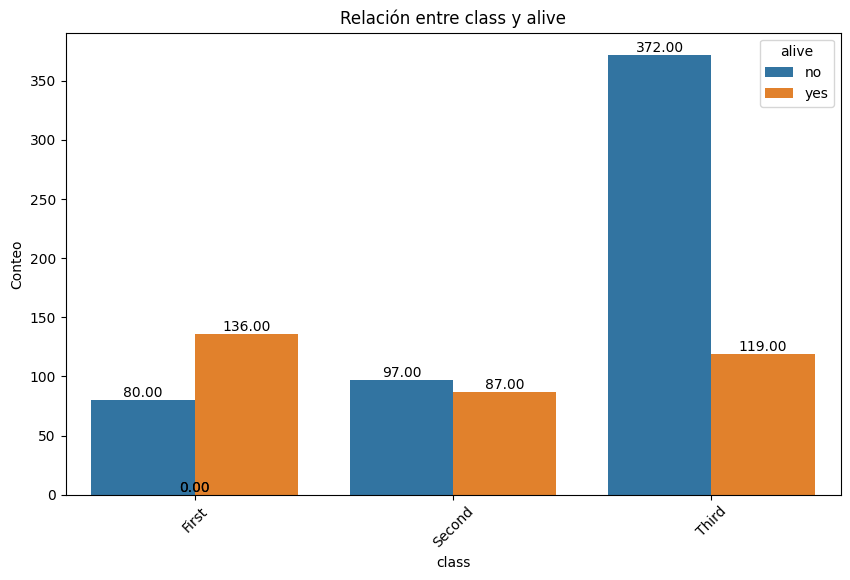

In [34]:
plot_categorical_relationship_fin(df1, "class", "alive", relative_freq=False, show_values=True)

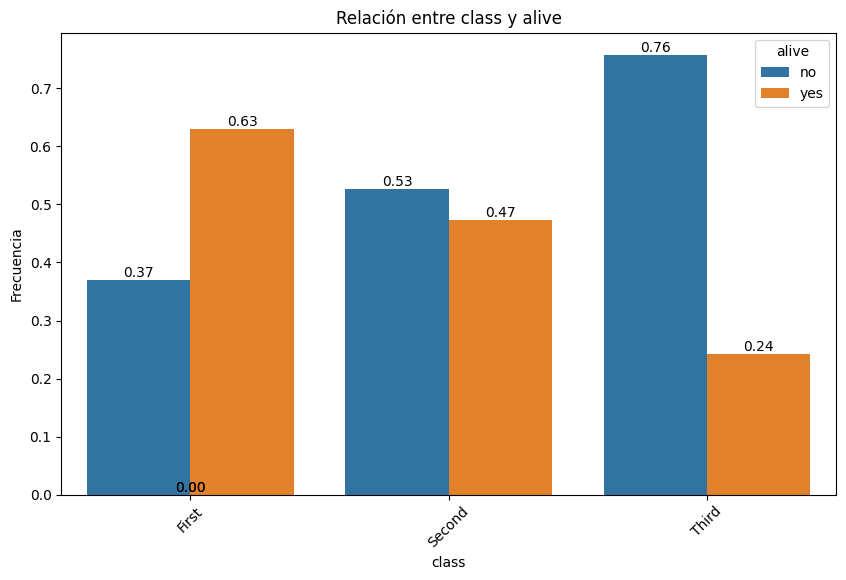

In [35]:
plot_categorical_relationship_fin(df1, "class", "alive", relative_freq=True, show_values=True)

In [36]:
chi2 (df1, "class", "alive")

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
Si el p-valor < 0.05 existe dependencia entre las variables


Sol2: En términos absolutos y relativos sobrevivieron más pasajeros de primera clase.

Según el p-valor de la chi2, existe relación entre class y alive.


3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

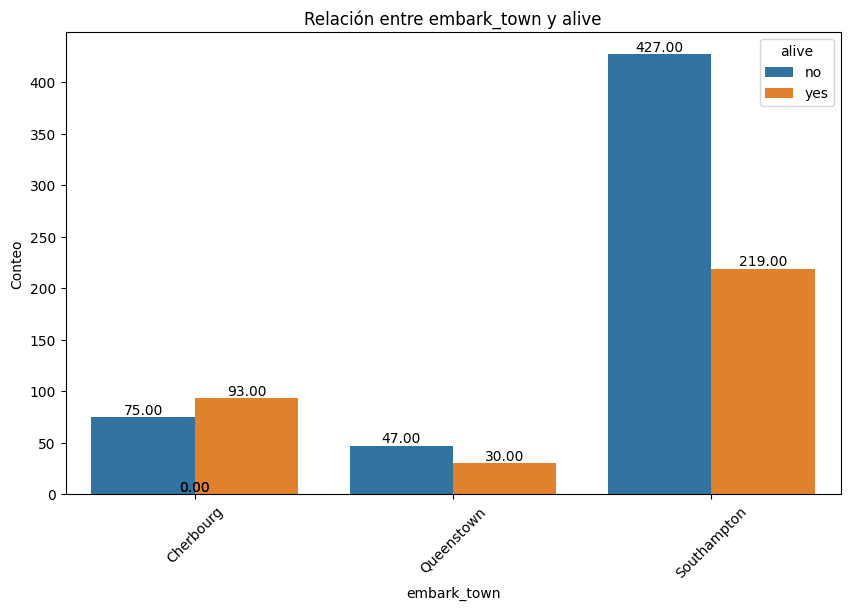

In [39]:
plot_categorical_relationship_fin(df1, "embark_town", "alive", relative_freq=False, show_values=True)

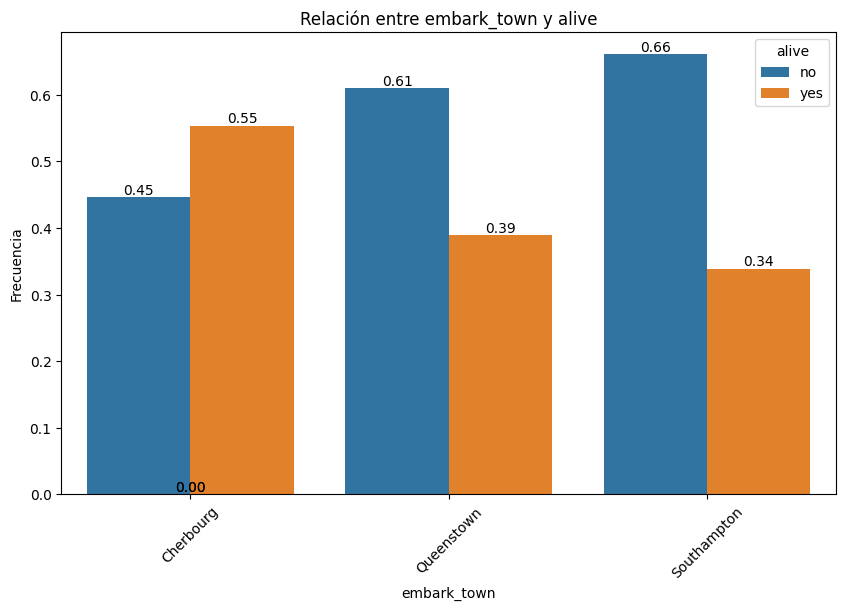

In [40]:
plot_categorical_relationship_fin(df1, "embark_town", "alive", relative_freq=True, show_values=True)

In [41]:
chi2(df1, "embark_town", "alive")

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]
Si el p-valor < 0.05 existe dependencia entre las variables


Sol3: Sobrevivieron más personas que embarcaron en Southampton. Porcentualmente, sobrevivieron más de Cherbourg. Efectivamente, existe relación. 

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

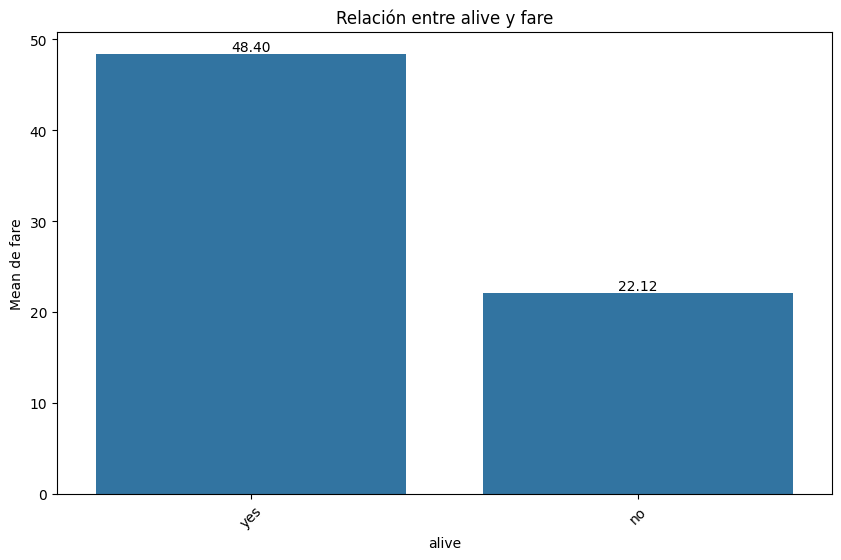

In [44]:
#El precio es numérica y alive categórica. Así que análisis bivariente numérica-categórica
plot_categorical_numerical_relationship(df1, "alive", "fare", show_values=True)

In [45]:
from scipy.stats import mannwhitneyu

def pruebau(df, columna_binaria, columna_numerica):
    binaria = df[columna_binaria].unique()

    grupo_a = df.loc[df[columna_binaria] == binaria[0]][columna_numerica]
    grupo_b = df.loc[df[columna_binaria] == binaria[1]][columna_numerica]

    u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

    print("Estadístico U:", u_stat)
    print("Valor p:", p_valor)
    print("Si p-valor < 0.05 existe relación entre las medianas de cada grupo de la binaria")

pruebau(df1, "alive", "fare")

Estadístico U: 57806.5
Valor p: 4.553477179250237e-22
Si p-valor < 0.05 existe relación entre las medianas de cada grupo de la binaria


Sol4: Sí existe relación, la media del precio de los que sobrevivieron es más del doble que la de los que no lo hicieron.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [46]:
df1[df1["fare"] == 0]


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [47]:
df1[df1["fare"] == df1["fare"].max()]


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


Sol5: De los que no pagaron, eran todo hombres, de Sothampton y que viajaban solos. Iba a suponer que eran trabajadores del barco, pero algunos iban alojados en primera y segunda clase, lo que no me encaja. Lo curioso es que solo sobrevivió uno de ellos.

De los que pagaron el máximo, sobrevivieron los 3.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [59]:
def analisis_num_catcat(df, num_col, cat1, cat2):
    """
    Analiza la relación entre una variable numérica y dos categóricas.
    Muestra estadísticas, tabla resumen por grupos y un boxplot.
    
    Parámetros:
    df      -> dataframe
    num_col -> nombre de la columna numérica
    cat1    -> primera categórica (factor 1)
    cat2    -> segunda categórica (factor 2)
    """
    
    print("\n=== 1. Estadísticas por combinación de categorías ===")
    tabla = df.groupby([cat1, cat2])[num_col].agg(["count", "mean", "median", "std"])
    display(tabla)

    print("\n=== 2. Boxplot múltiple para visualizar diferencias ===")
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=cat1, y=num_col, hue=cat2)
    plt.title(f"{num_col} según {cat1} y {cat2}")
    plt.show()

    print("\n=== 3. Observaciones sugeridas ===")
    print(f"- Observa si {num_col} varía mucho entre categorías de {cat1}.")
    print(f"- Comprueba si dentro de cada {cat1}, el subgrupo {cat2} muestra diferencias claras.")
    print(f"- Fíjate en la dispersión (boxplot) y en si las medias del pivot table son diferentes.")


=== 1. Estadísticas por combinación de categorías ===


count       mean    median        std
embark_town alive                                       
Cherbourg   no        75  35.443335  14.45830  49.617218
            yes       93  79.720926  56.92920  99.582717
Queenstown  no        47  13.335904   7.75000  13.550636
            yes       30  13.182227   7.80835  15.371167
Southampton no       427  20.743987  10.50000  27.896824
            yes      219  39.916514  26.00000  45.383008


=== 2. Boxplot múltiple para visualizar diferencias ===


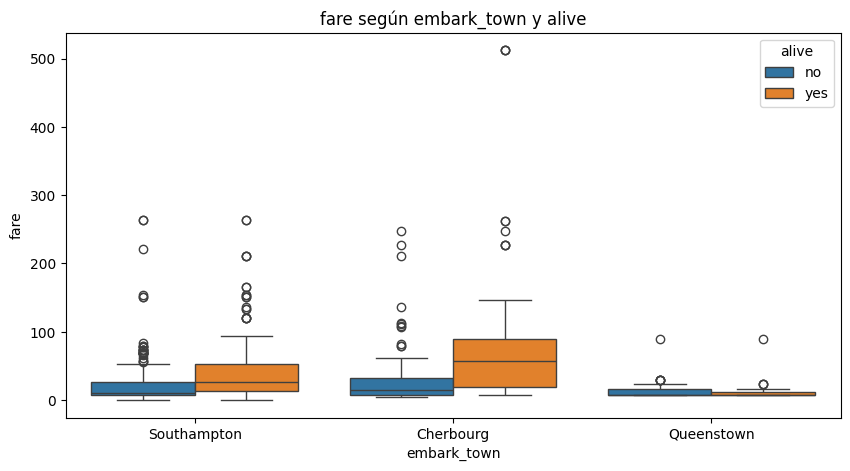


=== 3. Observaciones sugeridas ===
- Observa si fare varía mucho entre categorías de embark_town.
- Comprueba si dentro de cada embark_town, el subgrupo alive muestra diferencias claras.
- Fíjate en la dispersión (boxplot) y en si las medias del pivot table son diferentes.


In [61]:
# Análisis fare, embark_town y alive. 2 categ y 1 numerica
analisis_num_catcat(df1, "fare", "embark_town", "alive")

Sol6: Los de Queenstown son los que menos pagaron y también los que menos sobrevivieron. 

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?


=== 1. Estadísticas por combinación de categorías ===


count       mean     median        std
class  alive                                        
First  no        80  41.590875  38.500000  14.291043
       yes      136  35.064600  33.586562  13.059285
Second no        97  33.517648  32.000000  11.700569
       yes       87  26.208922  28.000000  14.557435
Third  no       372  28.316440  31.000000  10.890406
       yes      119  23.978808  27.000000  11.423809


=== 2. Boxplot múltiple para visualizar diferencias ===


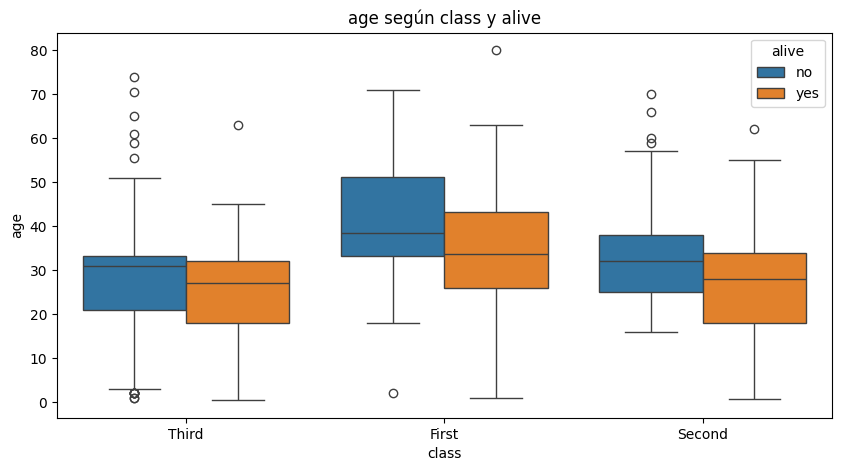


=== 3. Observaciones sugeridas ===
- Observa si age varía mucho entre categorías de class.
- Comprueba si dentro de cada class, el subgrupo alive muestra diferencias claras.
- Fíjate en la dispersión (boxplot) y en si las medias del pivot table son diferentes.


In [62]:
# Analisis alive, class y age. 2 categóricas y 1 numerica
analisis_num_catcat(df1, "age", "class", "alive")


Sol7: Se observa claramente que hay personas de mayor edad que no sobrevivieron. Y evidentemente, los de primera clase eran los más mayores.

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Respuesta no:


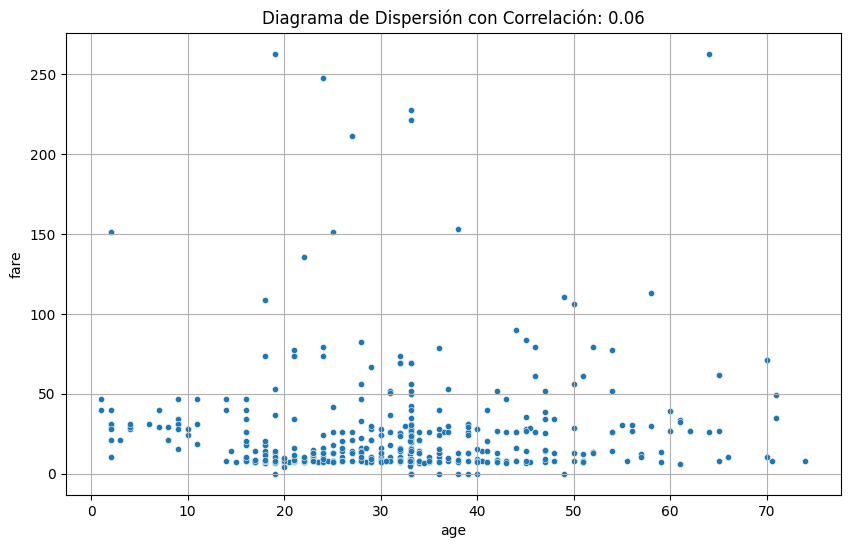

Respuesta yes:


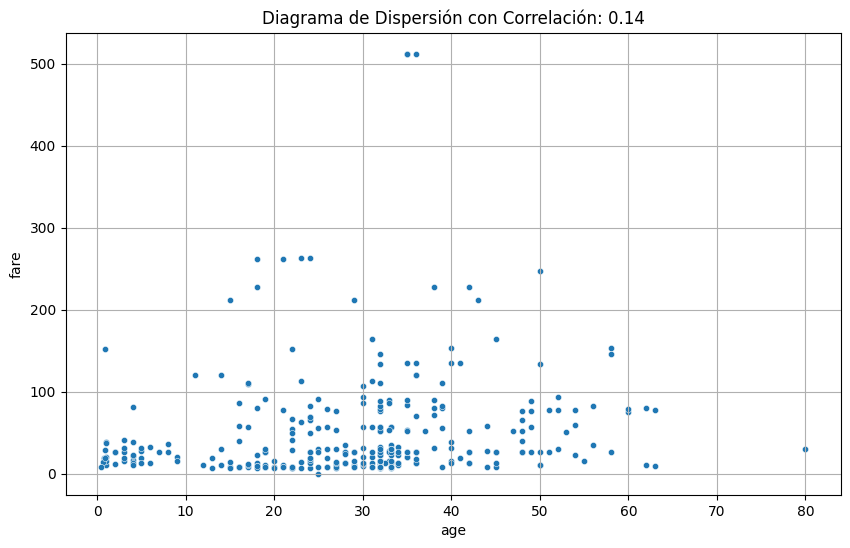

In [53]:
# Análisis entre age, fare y alive, 2 numéricas y una categórica
# Análisis 1 categórica 2 numéricas
def analisis_multi_1categorica_2numericas(df, var1_categorica, var2, var3):
    # donde var1 se separa según valores, var2 es la que agrupa en eje x y var3 es la de la leyenda
    diccionario_multivariante = {}
    for valor in df[var1_categorica].unique():
        diccionario_multivariante[valor] = df.loc[df[var1_categorica] == valor,[var2,var3]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        grafico_dispersion_con_correlacion(df_datos,var2,var3, tamano_puntos=20, mostrar_correlacion= True)

analisis_multi_1categorica_2numericas(df1, "alive", "age", "fare")

Sol8: No parece existir correlación entre estas variables.

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?